# Preparations

In [1]:
# Fetch packages.
import sys, os, numpy, libsbml, gillespy2
import matplotlib.pyplot as plt
import json
import statistics
import timeit
import numpy
from gillespy2 import TauHybridSolver, NumPySSASolver, ODESolver, ODECSolver, TauLeapingSolver, SSACSolver

In [2]:
# Plots the model simulation output.
def plot_results(result,species):
    for s in species:
      plt.plot(result['time'],result[s])

# Function for plotting benchmarking output.
def plot_benchmark(benchmarks,lengs):
    medians = list(1000*numpy.array(list(map(statistics.median, benchmarks))))
    plt.plot(lengs,medians,linewidth=4)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([lengs[0],lengs[-1]])
    plt.ylim([0.001,1.2*numpy.max(medians)])    # Choice of ymin does skew how plot appears.

In [3]:
# Benchmarking functions.
def make_ODE_benchmark(model,n,leng):
    def benchmark_func():
        model.run(solver=ODESolver,t=leng,integrator='lsoda')
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)
def make_Gillespie_benchmark(model,n,leng):
    def benchmark_func():
        model.run(solver=SSACSolver,t=leng)
    return timeit.Timer(benchmark_func).repeat(repeat=n, number=1)

# Serialises a benchmarking output using JSON.
def serialize(benchmarks,lengs,filename):
    with open('../Benchmarking_results/Prototyping/%s.json'%(filename) , "w") as write:
        json.dump({"benchmarks": benchmarks, "medians": list(1000*numpy.array(list(map(statistics.median, benchmarks)))), "lengs": lengs.tolist()} , write)

In [4]:
# Benchmarking parameters
n = 10

# Benchamarks

### Multistate

In [5]:
# Load model.
multistate_ss_time = 20
model_multistate = gillespy2.core.import_SBML('../Data/multistate.xml')[0]
model_multistate_no_obs = gillespy2.core.import_SBML('../Data/multistate_no_obs.xml')[0]

CPU times: user 13.9 s, sys: 0 ns, total: 13.9 s
Wall time: 13.9 s


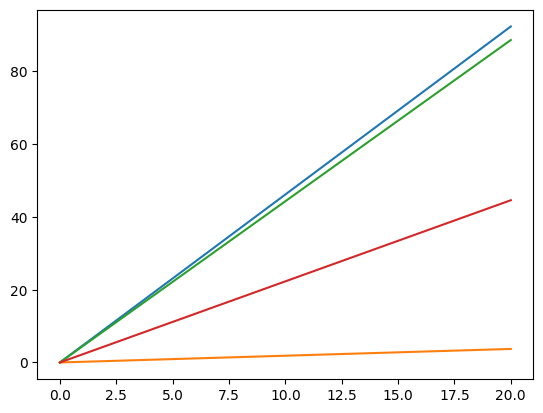

In [9]:
%time tc_multistate_THS = model_multistate.run(solver=TauHybridSolver,t=multistate_ss_time,increment=20.0)
plot_results(tc_multistate_THS,['A_P', 'A_unbound_P', 'A_bound_P','RLA_P'])

CPU times: user 18.3 s, sys: 61.1 ms, total: 18.4 s
Wall time: 18.3 s


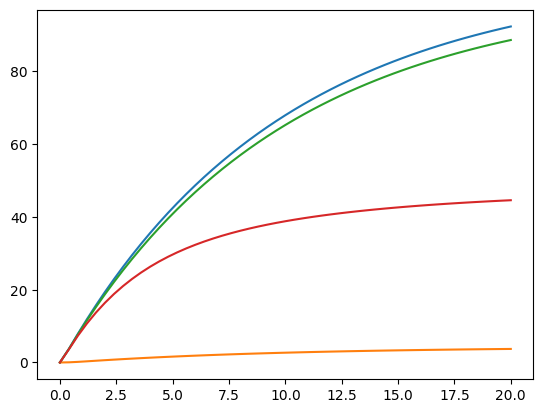

In [12]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_multistate_THS = model_multistate.run(solver=TauHybridSolver,t=multistate_ss_time,increment=multistate_ss_time/50.0)
plot_results(tc_multistate_THS,['A_P', 'A_unbound_P', 'A_bound_P','RLA_P'])
plt.savefig('../Plots/Trajectories/GillesPy2/multistate_ths.png')
plt.savefig('../Plots/Trajectories/GillesPy2/multistate_ths.pdf')

In [28]:
# Check ODE simulation time (plotting currently not possible).
%time tc_multistate_ODE = model_multistate_no_obs.run(solver=ODESolver,t=multistate_ss_time,increment=multistate_ss_time/20.0,integrator='lsoda',integrator_options={"atol":10e-12,"rtol":10e-6})

CPU times: user 15.1 ms, sys: 156 µs, total: 15.2 ms
Wall time: 14.8 ms


In [29]:
# Check SSA simulation time (plotting currently not possible).
%time tc_multistate_ODE = model_multistate_no_obs.run(solver=SSACSolver,t=multistate_ss_time,increment=multistate_ss_time/20.0)

CPU times: user 10.2 ms, sys: 114 µs, total: 10.4 ms
Wall time: 2.05 s


### Multisite2

In [31]:
# Load model.
multisite2_ss_time = 2
model_multisite2 = gillespy2.core.import_SBML('../Data/multisite2.xml')[0]
model_multisite2_no_obs = gillespy2.core.import_SBML('../Data/multisite2_no_obs.xml')[0]

CPU times: user 2min 17s, sys: 211 ms, total: 2min 18s
Wall time: 2min 18s


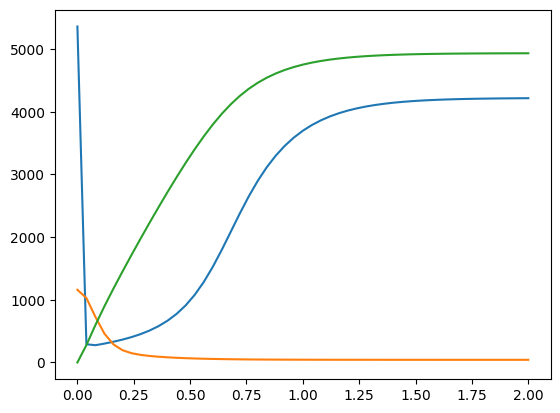

In [34]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_multisite2_THS = model_multisite2.run(solver=TauHybridSolver,t=multisite2_ss_time,increment=multisite2_ss_time/50.0)
plot_results(tc_multisite2_THS,['Rfree', 'Lfree', 'A1P'])
plt.savefig('../Plots/Trajectories/GillesPy2/multisite2_ths.png')
plt.savefig('../Plots/Trajectories/GillesPy2/multisite2_ths.pdf')

In [38]:
# Check ODE simulation time (plotting currently not possible).
%time tc_multisite2_ODE = model_multisite2_no_obs.run(solver=ODESolver,t=multisite2_ss_time,increment=multisite2_ss_time/50.0,integrator='lsoda',integrator_options={"atol":10e-12,"rtol":10e-6})

CPU times: user 258 ms, sys: 8 µs, total: 258 ms
Wall time: 256 ms


In [36]:
# Check SSA simulation time (plotting currently not possible).
%time tc_multisite2_ODE = model_multisite2_no_obs.run(solver=SSACSolver,t=multisite2_ss_time,increment=multisite2_ss_time/50.0)

CPU times: user 63.7 ms, sys: 0 ns, total: 63.7 ms
Wall time: 2.41 s


### Egfr_net

In [40]:
# Load model.
egfr_net_ss_time = 10
model_egfr_net = gillespy2.core.import_SBML('../Data/egfr_net.xml')[0]
model_egfr_net_no_obs = gillespy2.core.import_SBML('../Data/egfr_net_no_obs.xml')[0]

In [40]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_egfr_net_THS = model_egfr_net.run(solver=TauHybridSolver,t=egfr_net_ss_time,increment=egfr_net_ss_time/50.0)
plot_results(tc_egfr_net_THS,['Dimers', 'Sos_act', 'Y1068', 'Y1148', 'Shc_Grb', 'Shc_Grb_Sos', 'R_Grb2', 'R_Shc', 'R_ShcP', 'ShcP', 'R_G_S', 'R_S_G_S', 'Efgr_tot'])
plt.savefig('../Plots/Trajectories/GillesPy2/egfr_net_ths.png')
plt.savefig('../Plots/Trajectories/GillesPy2/egfr_net_ths.pdf')

In [ ]:
# Check ODE simulation time (plotting currently not possible).
%time tc_egfr_net_ODE = model_egfr_net_no_obs.run(solver=ODESolver,t=egfr_net_ss_time,increment=egfr_net_ss_time/50.0,integrator='lsoda',integrator_options={"atol":10e-12,"rtol":10e-6})

In [ ]:
# Check SSA simulation time (plotting currently not possible).
%time tc_egfr_net_ODE = model_egfr_net_no_obs.run(solver=SSACSolver,t=egfr_net_ss_time,increment=egfr_net_ss_time/50.0)

### BCR

In [4]:
# Load model.
bcr_ss_time = 10000
model_BCR = gillespy2.core.import_SBML('../Data/BCR.xml')[0]
model_BCR_no_obs = gillespy2.core.import_SBML('../Data/BCR_no_obs.xml')[0]

In [ ]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
%time tc_BCR_THS = model_BCR.run(solver=TauHybridSolver,t=bcr_ss_time,increment=bcr_ss_time/200.0)
plot_results(tc_BCR_THS,['Activated_Syk', 'Ig_alpha_P', 'Ig_alpha_PP', 'Ig_beta_PP', 'Activated_Lyn', 'Autoinhibited_Lyn', 'Activated_Fyn', 'Autoinhibited_Fyn', 'PAG1_Csk'])
plt.savefig('../Plots/Trajectories/GillesPy2/BCR_ths.png')
plt.savefig('../Plots/Trajectories/GillesPy2/BCR_ths.pdf')

In [33]:
# Check ODE simulation time (plotting currently not possible).
%time tc_BCR_ODE = model_multisite2_no_obs.run(solver=ODESolver,t=bcr_ss_time,increment=bcr_ss_time/200.0,integrator='lsoda',integrator_options={"atol":10e-12,"rtol":10e-6})

NameError: name 'bcr_ss_time' is not defined

In [ ]:
# Check SSA simulation time (plotting currently not possible).
%time tc_BCR_ODE = model_multisite2_no_obs.run(solver=SSACSolver,t=bcr_ss_time,increment=bcr_ss_time/200.0)

### Fceri_gamma2 
(Disabled for GillesPy2 due to very long runtimes)

In [ ]:
# Load model.
#fceri_gamma2_ss_time = 150
#model_fceri_gamma2 = gillespy2.core.import_SBML('../Data/fceri_gamma2.xml')[0]
#model_fceri_gamma2_no_obs = gillespy2.core.import_SBML('../Data/fceri_gamma2_no_obs.xml')[0]

In [ ]:
# Check output (plotting currently only possible using TauHybridSolver algorithm).
#%time tc_fceri_gamma2_THS = model_fceri_gamma2.run(solver=TauHybridSolver,t=fceri_gamma2_ss_time,increment=fceri_gamma2_ss_time/50.0)
#plot_results(tc_fceri_gamma2_THS,['Lyn_Free', 'RecMon', 'RecPbeta', 'RecPgamma', 'RecSyk', 'RecSykP5'])
#plt.savefig('../Plots/Trajectories/GillesPy2/fceri_gamma2_ths.png')
#plt.savefig('../Plots/Trajectories/GillesPy2/fceri_gamma2_ths.pdf')

In [ ]:
# Check ODE simulation time (plotting currently not possible).
#%time tc_fceri_gamma2_ODE = model_fceri_gamma2_no_obs.run(solver=ODESolver,t=fceri_gamma2_ss_time,increment=fceri_gamma2_ss_time/50.0,integrator='lsoda',integrator_options={"atol":10e-12,"rtol":10e-6})

In [ ]:
# Check SSA simulation time (plotting currently not possible).
#%time tc_fceri_gamma2_ODE = model_fceri_gamma2_no_obs.run(solver=SSACSolver,t=fceri_gamma2_ss_time,increment=fceri_gamma2_ss_time/50.0)